In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
54048,27723,"Gerardus Johannes Antonius ""Geert-Jan"" Derksen",M,25.0,199.0,100.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Coxed Eights,NaN
269912,135043,Nenad Zimonji,M,32.0,190.0,92.0,Serbia,SRB,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Men's Doubles,NaN
25233,13207,Jerzy Boniecki,M,19.0,179.0,75.0,Poland,POL,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN
241784,121102,Liliana Topea,F,25.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df = df[df['Season'] =='Summer']

In [7]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
140058,70318,Carrie Lingo,F,28.0,175.0,68.0,United States,USA,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,NaN
89336,45284,Kyle Hamilton,M,30.0,199.0,96.0,Canada,CAN,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Coxed Eights,Gold
242200,121314,Marco Torrieri,M,26.0,180.0,75.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 200 metres,NaN
124532,62890,Jorma Olavi Korpela,M,23.0,183.0,74.0,Finland,FIN,1984 Summer,1984,Summer,Los Angeles,Modern Pentathlon,Modern Pentathlon Men's Individual,NaN
264161,132192,Aleksey Andreyevich Yakimenko,M,24.0,184.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's Sabre, Individual",NaN


In [8]:
region_df.sample(4)

,NOC,region,notes
68,FIN,Finland,NaN
32,BUL,Bulgaria,NaN
214,URS,Russia,NaN
104,JPN,Japan,NaN


In [9]:
df = df.merge(region_df,on='NOC',how= 'left')

In [10]:
df['region'].unique().shape

(206,)

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts() # Doing one-hot encoding, there 
# are NaN values 

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [16]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [17]:
df.shape

(221167, 17)

In [18]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis = 1)

In [19]:
df.shape

(221167, 20)

In [20]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
102961,63214,Olga Ivanovna Kotlyarova,F,20.0,180.0,66.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 400 metres,NaN,Russia,NaN,0,0,0
165380,100982,Jacques Riparelli,M,25.0,183.0,80.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Italy,NaN,0,0,0
23861,14842,"John Michael ""Mike"" Breckin",M,22.0,180.0,80.0,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Foil, Team",NaN,UK,NaN,0,0,0
26893,16645,Peter Burling,M,21.0,186.0,82.0,New Zealand,NZL,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Skiff,Silver,New Zealand,NaN,0,0,1
66948,40795,Desiree Guillermina Glod John,F,25.0,176.0,64.0,Venezuela,VEN,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,NaN,Venezuela,NaN,0,0,0


In [21]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
# this is not matching with the website 
# the data is organised wrt to athletes 
# if you win 1 gold medal as a team , it has dedicated medals to all team members
# if India will 8 gold medal in hockey, so medal here is 11*8

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [22]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [23]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [24]:
# Drop duplicates where NOC, games, year , season , city , sports are same
medal_tally = df.drop_duplicates(subset =['Team', 'NOC', 'Games','Year', 'City', 'Sport', 'Event', 'Medal'])
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [25]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

In [26]:
medal_tally['Total'] = medal_tally['Gold']+ medal_tally['Silver']+ medal_tally['Bronze']

In [27]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [28]:
# for Drop down year and country 
years = df['Year'].unique().tolist()

In [29]:
years.sort()

In [30]:
years.insert(0,"Overall ")
years

['Overall ',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
countries = df['region'].dropna().values
countries

array(['China', 'China', 'Denmark', ..., 'Russia', 'Russia', 'Belarus'],
      dtype=object)

In [32]:
country = np.unique(countries).tolist()
country.insert(0,"Overall")
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [33]:
def fetch_medal_tally(df,year,country):
    
    # Drop duplicates where NOC, games, year , season , city , sports are same

    medal_df = df.drop_duplicates(subset =['Team', 'NOC', 'Games','Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0 
    if year == "Overall" and country == "Overall":
        temp_df = medal_df 
    if year == "Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df['region'] == country)&(medal_df['Year'] == int(year))]
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending = True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
    
    x['Total'] = x['Gold']+ x['Silver']+ x['Bronze']
    
    print(x)

In [34]:
fetch_medal_tally(df,year= 2016 ,country = "India")

  region  Gold  Silver  Bronze  Total
0  India     0       1       1      2


OVER ALL Analysis

No of Cities
No of Events and Sports
No of Atheles 

In [35]:
df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
184270,112699,David Immanuel Sderberg,M,25.0,185.0,96.0,Finland,FIN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Hammer Throw,NaN,Finland,NaN,0,0,0
43422,26530,Daynara Lopes Ferreira de Paula,F,27.0,163.0,55.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN,Brazil,NaN,0,0,0
165042,100754,"Anthony ""Tony"" Ries, Jr.",M,20.0,NaN,NaN,South Africa,RSA,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,South Africa,NaN,0,0,0


In [36]:
cities = np.unique(df['City']).tolist()
cities.insert(0,"Overall")
cities

['Overall',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Seoul',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo']

In [37]:
# No of Cities 

df.groupby('City').sum()[['Bronze', 'Gold', 'Silver']]

,Bronze,Gold,Silver
City,,,
Amsterdam,250.0,245.0,239.0
Antwerpen,367.0,493.0,448.0
Athina,860.0,883.0,859.0
Atlanta,629.0,608.0,605.0
Barcelona,604.0,559.0,549.0
Beijing,710.0,671.0,667.0
Berlin,295.0,312.0,310.0
Helsinki,300.0,306.0,291.0
London,1214.0,1215.0,1195.0


In [48]:
# city_sp_df= df[['City','Sport','Year']]
# city_sp_df
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [153]:
city_sp_df = df.drop_duplicates(subset =['City', 'Sport','Year'])
city_sp_df[['City', 'Sport','Year']]
# city_sp_df[city_sp_df['City']== "Barcelona"]

,City,Sport,Year
0,Barcelona,Basketball,1992
1,London,Judo,2012
2,Antwerpen,Football,1920
3,Paris,Tug-Of-War,1900
4,Los Angeles,Athletics,1932
...,...,...,...
52898,Athina,Weightlifting,1896
52900,Athina,Wrestling,1896
92545,St. Louis,Weightlifting,1904
175283,Los Angeles,Alpinism,1932


In [42]:
def city_sport_tally(df,year,city):
    city_sp_df = df.drop_duplicates(subset =['City', 'Sport','Year'])
    city_sp_df = city_sp_df[['City', 'Sport','Year']]
    
    if year == 'Overall' and city == 'Overall':
        temp_df = city_sp_df
    if year == 'Overall'and city != 'Overall':
        temp_df = city_sp_df[city_sp_df['City'] == city]
    if year != 'Overall'and city == 'Overall':
        temp_df = city_sp_df[city_sp_df['Year'] == year]
    if year != 'Overall'and city != 'Overall':
        temp_df = city_sp_df[(city_sp_df['Year'] == year)&(city_sp_df['City'] == city)]
        
    print(temp_df)  

In [46]:
city_sport_tally(df,year = 1896,city = "Overall")

         City          Sport  Year
2676   Athina         Tennis  1896
6399   Athina      Athletics  1896
6404   Athina       Swimming  1896
6511   Athina     Gymnastics  1896
7011   Athina       Shooting  1896
8842   Athina        Cycling  1896
28255  Athina        Fencing  1896
52898  Athina  Weightlifting  1896
52900  Athina      Wrestling  1896


In [40]:
def get_chart_dat(df,col):
    yer_region = df[['Year',col]].drop_duplicates()
    yer_region['Count'] = 1
    yer_region1 = yer_region.groupby('Year').sum().reset_index()
    yer_region1 = yer_region1.rename{'Year':'Edition','Count':'Countires'}
 
    fig = px.line(yer_region1,x='Year',y='Countires')
    fig.show()


In [89]:
def data_over_time(df):
    
    nation_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
    nation_over_time.rename(columns={'index': 'Edition', 'Year': 'region'}, inplace=True)
    return nation_over_time

In [90]:
nation_over_time = data_over_time(df)
nation_over_time

,Edition,region
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [98]:
import seaborn as sns

<AxesSubplot:xlabel='Edition', ylabel='region'>

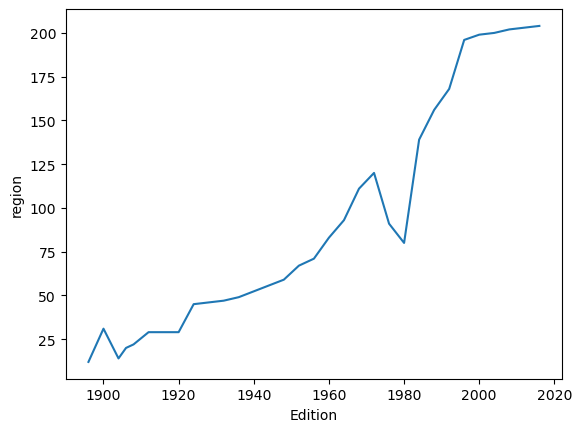

In [97]:
sns.lineplot(x = nation_over_time['Edition'],y = nation_over_time['region'])

In [99]:
import matplotlib.pyplot as plt

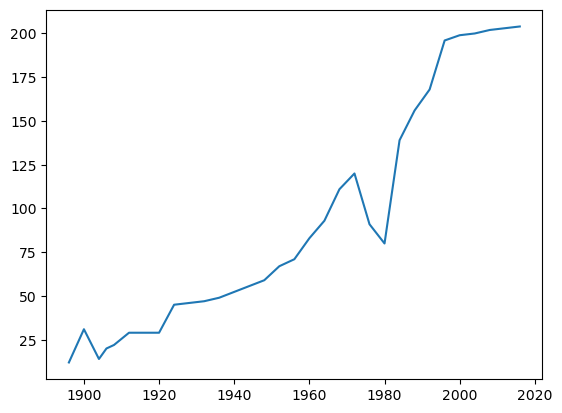

In [85]:
plt.plot(Year,Countires)

In [72]:
import plotly.express as px
fig = px.line(nation_over_time,x='Edition',y='region')
fig.show()

Univarite 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  uint8  
 18  Gold    221167 non-null  uint8  
 19  Silver  221167 non-null  uint8  
dtypes: float64(3), int64(2), object(12), uint8(3)
me

(array([9.9000e+02, 1.6815e+04, 7.1869e+04, 5.9668e+04, 3.3802e+04,
        1.7009e+04, 5.3880e+03, 2.9910e+03, 1.9180e+03, 7.6900e+02,
        3.9300e+02, 2.8500e+02, 1.2100e+02, 5.8000e+01, 4.9000e+01,
        5.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([10.  , 14.35, 18.7 , 23.05, 27.4 , 31.75, 36.1 , 40.45, 44.8 ,
        49.15, 53.5 , 57.85, 62.2 , 66.55, 70.9 , 75.25, 79.6 , 83.95,
        88.3 , 92.65, 97.  ]),
 <BarContainer object of 20 artists>)

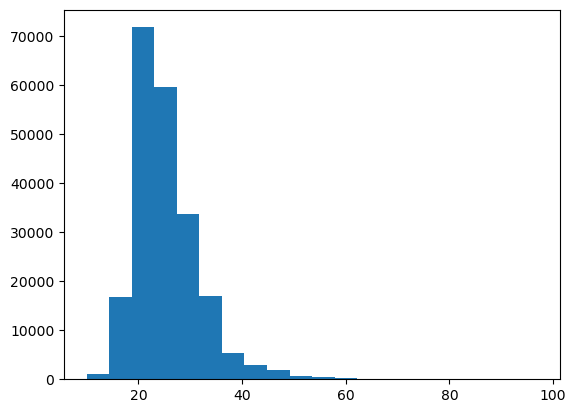

In [108]:
plt.hist(df['Age'],bins=20)

2024-06-11 15:26:16,934 [1742] WARNING  py.warnings:109: [JupyterRequire] /opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).




<AxesSubplot:xlabel='Height', ylabel='Density'>

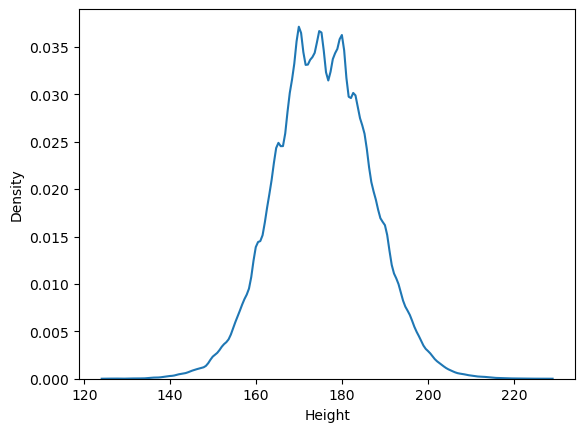

In [109]:
sns.distplot(df['Height'],hist = False)

<AxesSubplot:ylabel='Sport'>

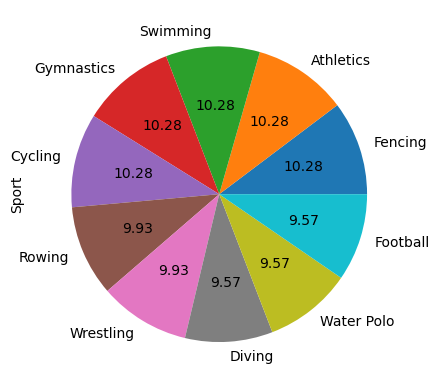

In [127]:
df[['Sport','Year']].drop_duplicates()['Sport'].value_counts().head(10).plot(kind = 'pie',autopct = '%.2f')

2024-06-11 16:42:28,359 [1742] WARNING  py.warnings:109: [JupyterRequire] /opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




<AxesSubplot:xlabel='Age'>

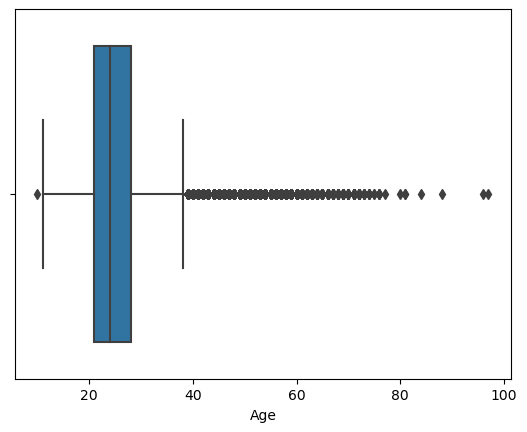

In [128]:
sns.boxplot(df['Age'])

<AxesSubplot:>

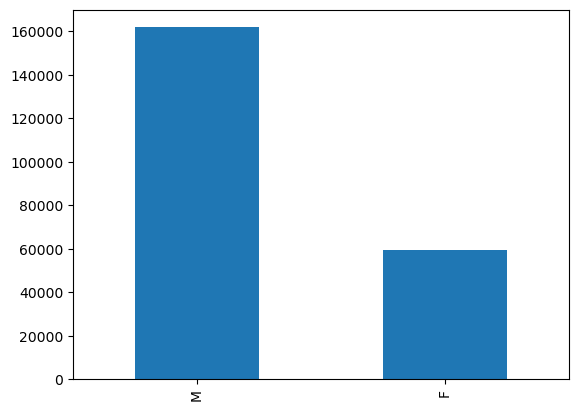

In [133]:
df['Sex'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

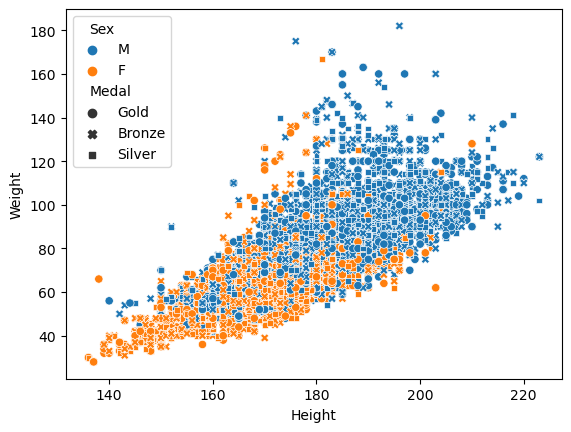

In [137]:
sns.scatterplot(x = df['Height'],y = df['Weight'],hue = df['Sex'],style = df['Medal'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

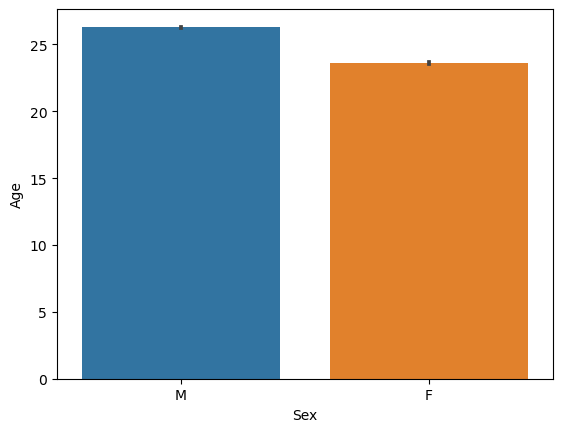

In [142]:
sns.barplot(x = df['Sex'],y = df['Age'])

2024-06-11 17:04:07,257 [1742] WARNING  py.warnings:109: [JupyterRequire] /opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


2024-06-11 17:04:07,331 [1742] WARNING  py.warnings:109: [JupyterRequire] /opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


2024-06-11 17:04:07,378 [1742] WARNING  py.warnings:109: [JupyterRequire] /opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated

<AxesSubplot:xlabel='Weight', ylabel='Density'>

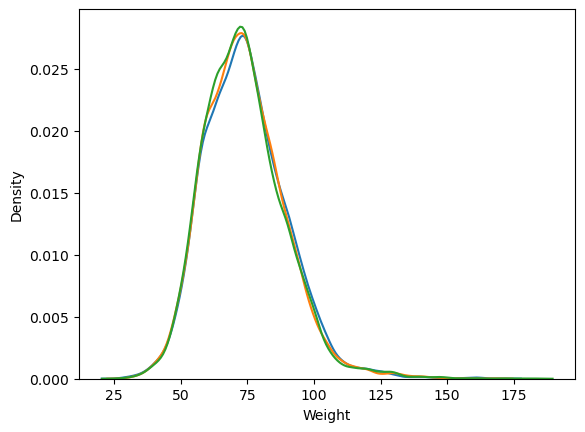

In [148]:
sns.distplot(df[df['Medal']== 'Gold']['Weight'],hist = False)
sns.distplot(df[df['Medal']== 'Silver']['Weight'],hist = False)
sns.distplot(df[df['Medal']== 'Bronze']['Weight'],hist = False)

<AxesSubplot:ylabel='Sex'>

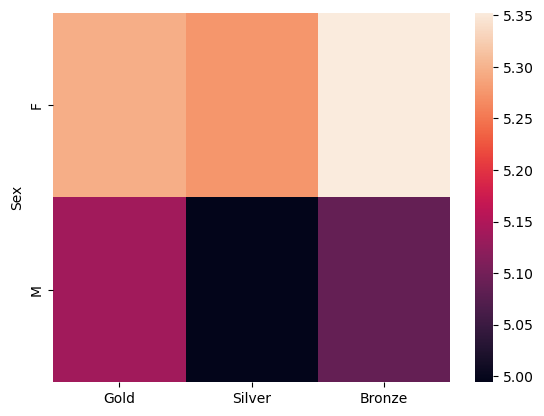

In [158]:
sns.heatmap(df.groupby('Sex').mean()[['Gold','Silver','Bronze',]]*100)

In [178]:
event_year = df[['Year','Event']].drop_duplicates()

In [179]:
event_year = event_year['Year'].value_counts().reset_index()

In [181]:
event_year.rename(columns = {'index': 'Year','Year': 'Events'},inplace = True)

In [182]:
event_year

,Year,Events
0,2016,306
1,2008,302
2,2012,302
3,2004,301
4,2000,300
5,1996,271
6,1992,257
7,1988,237
8,1984,221
9,1980,203


In [186]:
import plotly.express as px
fig = px.line(event_year,x='Year',y='Events')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

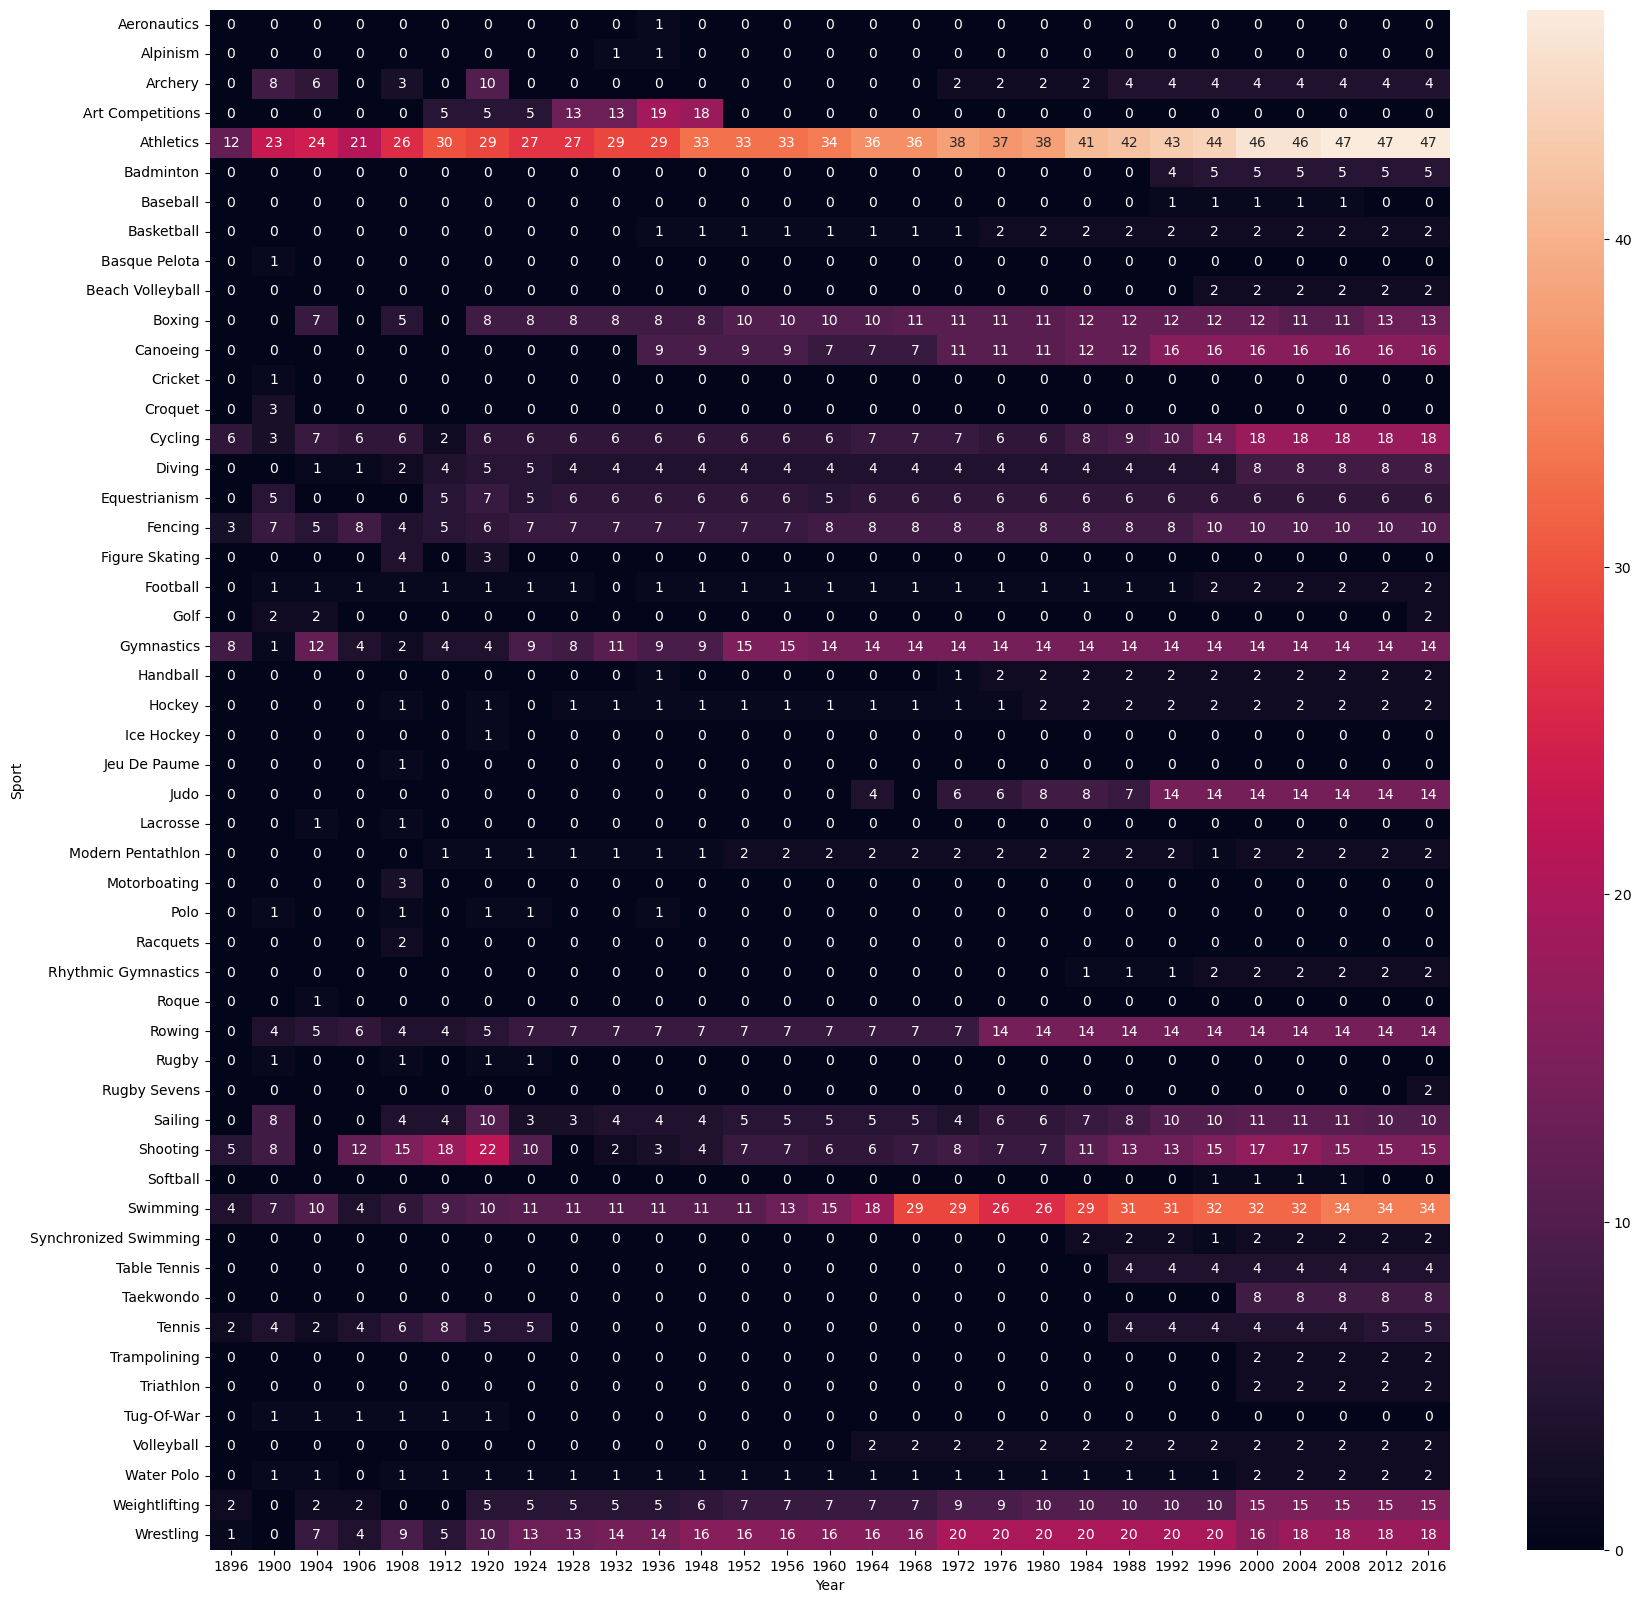

In [196]:
x = df.drop_duplicates(['Year','Sport','Event'])
import seaborn as sns 

plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index = 'Sport', columns = 'Year', values = 'Event',aggfunc='count').fillna(0).astype('int'),annot = True)